## Train a Perceptron classifier using scikit-learn library on Iris dataset

In [1]:
from sklearn import datasets
import numpy as np

In [2]:
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target
print("Class labels: ", np.unique(y)) #the Iris flower class names, Iris-setosa Iris-versicolor, and Iris-virginica (0, 1, 2).

Class labels:  [0 1 2]


To evaluate how well a trained model performs on unseen data, we will further split the dataset into separate training and test datasets.

Randomly split the X and y arrays into 30 percent test data (45 examples) and 70 percent training data (105 examples).

Stratification means that the train_test_split method returns training and test subsets that have the same proportions of class labels as the input dataset.

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

We can use NumPy's `bincount` function, which counts the number of occurrences of each value in an array, to verify that this is indeed the case:

In [4]:
print('Labels in y:', np.bincount(y))
print('lables in y_train:', np.bincount(y_train))
print('labes in y_test', np.bincount(y_test))

Labels in y: [50 50 50]
lables in y_train: [35 35 35]
labes in y_test [15 15 15]


Many machine learning and optimization algorithms also require feature scaling for optimal performance, we will
standardize the features using the `StandardScaler` class from scikit-learn's `preprocessing` module

In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

We can now train a perceptron model. Most algorithms in scikit-learn already support multiclass classification by default via the one-vs.-rest (OvR) method, which allows us to feed the three flower classes to the perceptron all at once.

In [7]:
from sklearn.linear_model import Perceptron
ppn = Perceptron(eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)

Perceptron(eta0=0.1, random_state=1)

We can make predictions via the predict method

In [8]:
y_pred = ppn.predict(X_test_std)
print('Missclassified Exmpales: %d' %(y_test != y_pred).sum())

Missclassified Exmpales: 1


We can calculate the classification accuracy of the perceptron on the test dataset.

In [9]:
from sklearn.metrics import accuracy_score
print('Accuracy: %f' %accuracy_score(y_test, y_pred))

Accuracy: 0.977778


Alternatively, each classifier in scikit-learn has a `score` method, which computes a classifier's prediction accuracy by combining the `predict` call with `accuracy_score`

In [10]:
print('Accuracy %.3f' %ppn.score(X_test_std, y_test))

Accuracy 0.978


We can use our `plot_decision_regions` function to plot the decision regions of our newly trained perceptron model and visualize how well it separates the different flower examples.

In [19]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
    np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=colors[idx], 
                    marker=markers[idx], label=cl, edgecolor='black')
    # highlight test examples
    if test_idx:
    # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='none', edgecolor='black', alpha=1.0, 
                    linewidth=1, marker='o', s=100, label='test set')

C:\Users\promar\AppData\Local\Temp\ipykernel_12728\2480519612.py:20: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=colors[idx],


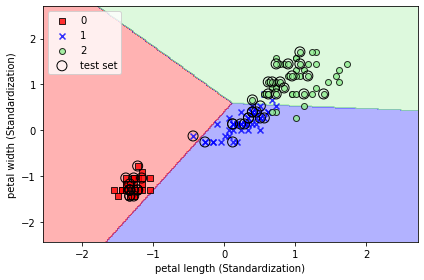

In [20]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X=X_combined_std, y=y_combined, classifier=ppn, test_idx=range(105, 150))
plt.xlabel('petal length (Standardization)')
plt.ylabel('petal width (Standardization)')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

**The perceptron algorithm never converges on datasets that aren't perfectly linearly separable, which is why the use of the perceptron algorithm is typically not recommended in practice.**